# Fashion MNIST

Primero importemos las librerias necesarias para manipular la base de datos.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
train = pd.read_csv('../Data/fashion-mnist_train.csv')

In [94]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
test = pd.read_csv('../Data/fashion-mnist_test.csv')

In [96]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
train.shape , test.shape

((60000, 785), (10000, 785))

In [98]:
train.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [99]:
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

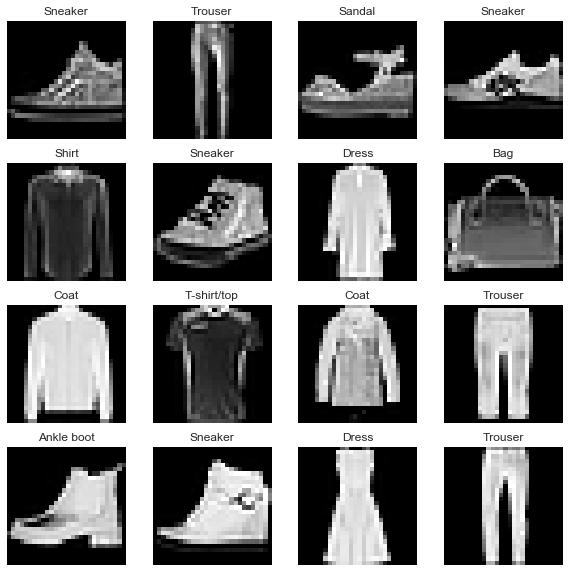

In [100]:
fig, axes = plt.subplots(4, 4, figsize = (10,10))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = train.drop('label', axis=1).values[index].reshape(28,28)
        cloths = train['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

In [101]:
X = train.iloc[:,1:]
Y = train.iloc[:,0]

In [102]:
X = X.iloc[500:4500]
Y = Y.iloc[500:4500]

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [105]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [106]:
pca = PCA(n_components = 150,whiten = True, random_state=12)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
model = make_pipeline(pca,svc)

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid = {
    'svc__C':[0.1,1,5,10,50],
    'svc__gamma':[0.0001,0.0005,0.001,0.005,0.01]
}
grid = GridSearchCV(model, param_grid)
 
%time grid.fit(X_train, Y_train)

Wall time: 3min 40s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=12,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.1, 1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]})

In [109]:
print(grid.best_params_)

{'svc__C': 1, 'svc__gamma': 0.005}


In [110]:
classifier = grid.best_estimator_
yfit = classifier.predict(X_valid)

Text(0.5, 0.98, 'Predicciones de las imágenes (incorrectas en rojo)')

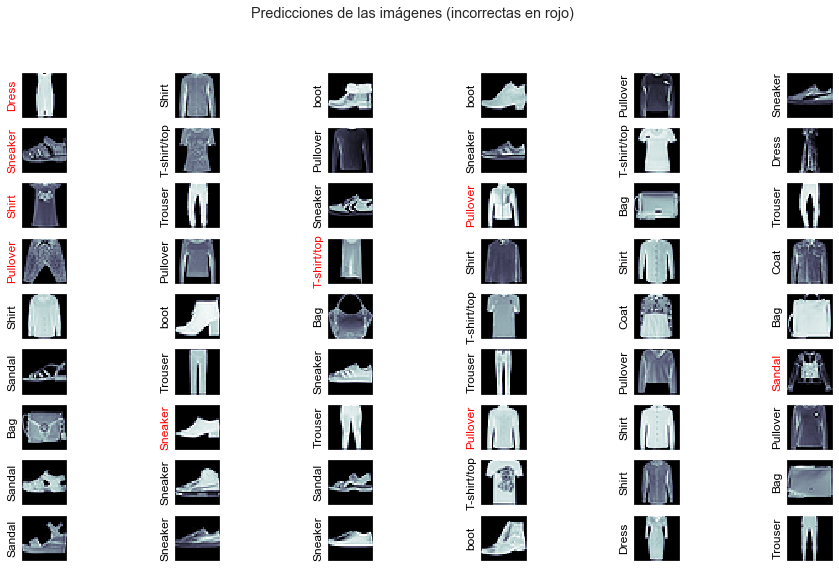

In [111]:
fig, ax = plt.subplots(9,6,figsize = (16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(X_valid.values[i].reshape(28,28), cmap='bone')
    ax_i.set(xticks=[],yticks=[])
    ax_i.set_ylabel(clothing[yfit[i]].split()[-1],
                   color = 'black' if yfit[i] == Y_valid.values[i] else 'red')
fig.suptitle('Predicciones de las imágenes (incorrectas en rojo)')

In [112]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(Y_valid,yfit,target_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.81      0.82       119
     Trouser       1.00      0.94      0.97       145
    Pullover       0.76      0.74      0.75       123
       Dress       0.84      0.85      0.84       125
        Coat       0.78      0.73      0.76       113
      Sandal       0.89      0.95      0.92       114
       Shirt       0.63      0.69      0.66       103
     Sneaker       0.95      0.95      0.95       132
         Bag       0.87      0.93      0.90        97
  Ankle boot       0.95      0.95      0.95       129

    accuracy                           0.86      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.86      0.86      0.86      1200



In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
mat = confusion_matrix(Y_valid,yfit)

In [116]:
import seaborn as sns;sns.set()

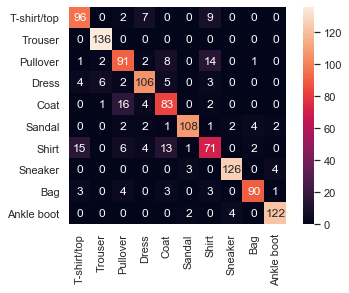

In [117]:
sns.heatmap(mat.T,square = True,annot = True,fmt='d',cbar=True,
           xticklabels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], yticklabels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])